In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
import ee
ee.Authenticate()
ee.Initialize(project="ee-gaoliaoran2020")

In [3]:
# import geemap
import geemap
import datetime
import numpy as np
import math
from math import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
import matplotlib.font_manager as fm
font_paths = fm.findSystemFonts()
font_paths

['/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/L

In [5]:
import matplotlib as mpl
mpl.rcParams["font.serif"]

['DejaVu Serif',
 'Bitstream Vera Serif',
 'Computer Modern Roman',
 'New Century Schoolbook',
 'Century Schoolbook L',
 'Utopia',
 'ITC Bookman',
 'Bookman',
 'Nimbus Roman No9 L',
 'Times New Roman',
 'Times',
 'Palatino',
 'Charter',
 'serif']

In [ ]:
Supervised_classification = ee.Image("projects/ee-gaoliaoran2020/assets/classification_all_series")
probability_all_series = ee.Image("projects/ee-gaoliaoran2020/assets/probility_all_series")
four = ee.FeatureCollection("projects/ee-gaoliaoran2020/assets/zhangZT/2020_the_second_method/four")
LULC = ee.ImageCollection("ESA/WorldCover/v100").first().clip(four);
image_cropland = LULC.updateMask(LULC.eq(40)).multiply(0).add(1)
probability_max = probability_all_series.reduce(ee.Reducer.max())
classification_cropland = Supervised_classification.add(1).multiply(image_cropland)

In [ ]:
def mask_type(image,my_type):
  mask=image.eq(my_type);
  masked_image=image.updateMask(mask);
  return masked_image;

In [ ]:
corn_area = mask_type(classification_cropland, 1)
corn_wheat_area = mask_type(classification_cropland, 2)
cotton_area = mask_type(classification_cropland, 3)
wheat_area = mask_type(classification_cropland, 4)
fruit_area = mask_type(classification_cropland, 5)

In [ ]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Map.addLayer(cotton_area.multiply(0).add(1))
# mask_probability_start=probability_max.multiply(cotton_area).gte(0.6).selfMask()
# mask_probability_end=probability_max.multiply(cotton_area).lt(0.7).selfMask()
# probability = mask_probability_start.add(mask_probability_end)
# Map.addLayer(mask_probability_end)

In [ ]:
def pixel_count_probability_class(class_image, probability_start, probablility_end):
  class_image = class_image.multiply(0).add(1)
  mask_probability_start = probability_max.multiply(class_image).gte(probability_start).selfMask()
  mask_probability_end = probability_max.multiply(class_image).lt(probablility_end).selfMask()
  probability = mask_probability_start.add(mask_probability_end).eq(2).selfMask()
  countDictionary = probability.reduceRegion(
    reducer=ee.Reducer.count(),
    geometry=four.geometry(),
    scale=10,
    maxPixels=1e13
    );
  number = countDictionary.getInfo()

  value = number["max"]
  print('cropland',value);
  return value

In [ ]:
area = corn_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 2100761
cropland 13152847
cropland 4286894
cropland 3396940
cropland 1767565
cropland 784
cropland 0
cropland 0


In [ ]:
image = [0,0,2100761,13152847,4286894,3396940,1767565,784,0,0]

In [ ]:
import csv
import os, sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import math

In [ ]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 5
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

cornData = np.array(data['max'].values)
cornData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
corn_test.csv


array([0.4024128 , 0.615368  , 0.34792045, 0.4320136 , 0.56032556,
       0.46102837, 0.63092583, 0.5314583 , 0.59014004, 0.55839944,
       0.5312538 , 0.65478456, 0.6202479 , 0.6527195 , 0.4893026 ,
       0.59169054, 0.60346454, 0.6201493 , 0.5334916 , 0.48544225,
       0.45311704])

In [ ]:
def count_sample(class_data, probability_start, probablility_end):
  number = 0
  for i in range(len(class_data)):
    data = class_data[i]
    if data >= probability_start and data < probablility_end:
      number = number+1
    else:
      continue
  return number

In [ ]:
Data = cornData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [ ]:
image_percent = [x/sum(image) for x in image]
point_percent = [x/sum(point) for x in point]

In [ ]:
image_percent

[0.0,
 0.0,
 0.08503111679362947,
 0.5323791090113245,
 0.1735177796978854,
 0.13749569888290564,
 0.07154456216358343,
 3.173345067154498e-05,
 0.0,
 0.0]

In [ ]:
point_percent

[0.0,
 0.0,
 0.0,
 0.047619047619047616,
 0.2857142857142857,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.0,
 0.0]

In [ ]:
D = 0
end = 6
new_image = image[:-3]
new_point_percent = point_percent[:-3]
for j in range(0,end):
  new_image[j] = 0
  new_image_percent = [x/sum(new_image) for x in new_image]
  D = 0
  # print(new_image_percent)
  # print(new_point_percent)
  for i in range(0,len(new_image_percent)):
    x = (abs(point_percent[i]-new_image_percent[i])-0.1)**2
    D = D+x
  print(D)

0.2037848008159855
0.2037848008159855
0.24955936748926102
0.04495822668411649
0.12589096564362465
0.4427891156462586


In [6]:
corn_list = [0.20864625064637196,0.20864625064637196,0.26922854061134216,0.062472070011341196,0.38834467120181415]
corn_difference = [0]
for i in range(1,len(corn_list)):
  if corn_list[i]-corn_list[i-1] == 0:
    corn_difference.append(0)
  elif corn_list[i]-corn_list[i-1] > 0:
    corn_difference.append(1)
  else:
    corn_difference.append(-1)
i = [0.1,0.2,0.3,0.4,0.5]
corn_difference

[0, 0, 1, -1, 1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

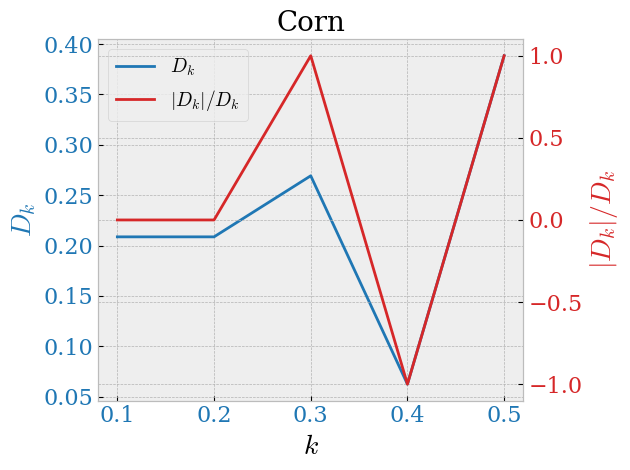

In [21]:
# Create some mock data
fig, ax1 = plt.subplots()
mpl.rc('font', family='serif')
plt.style.use('bmh')
color = 'tab:blue'
ax1.set_xlabel('$k$',size=20)
ax1.set_ylabel('$D_k$',color=color,size=20)
lns1 =ax1.plot(i,corn_list,color=color,label='$D_k$')
ax1.tick_params(axis='y',labelcolor=color,labelsize=16)
ax1.tick_params(axis='x',labelcolor=color,labelsize=16)
ax1.set_title("Corn",size=20)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('$|D_k|/D_k$',color=color,size=20)
lns2 =ax2.plot(i, corn_difference,color=color,label='$|D_k|/D_k$')
ax2.tick_params(axis='y',labelcolor=color,labelsize=16)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0,prop={'size':14})

fig.tight_layout()
plt.savefig('corn.png',dpi=330,format='png',bbox_inches='tight')
files.download('corn.png')

In [ ]:
image_00_01 = pixel_count_probability_class(cotton_area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(cotton_area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(cotton_area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(cotton_area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(cotton_area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(cotton_area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(cotton_area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(cotton_area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(cotton_area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(cotton_area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 1194355
cropland 6916834
cropland 9029750
cropland 15611966
cropland 13354467
cropland 398683
cropland 0
cropland 0


In [ ]:
image = [0,0,1194355,6916834,9029750,15611966,13354467,398683,0,0]

In [ ]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 6
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

cottonData = np.array(data['max'].values)
cottonData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
cotton_test.csv


array([0.5725522 , 0.6099655 , 0.5310425 , 0.6782856 , 0.5133895 ,
       0.65504694, 0.55549157, 0.5957753 , 0.4473068 , 0.5619567 ,
       0.6409938 , 0.5955504 , 0.60740024, 0.6533191 , 0.6743271 ,
       0.5868163 , 0.6495694 , 0.5341292 , 0.43915072, 0.5247625 ,
       0.62049943])

In [ ]:
Data = cottonData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [ ]:
image_percent = [x/sum(image) for x in image]
image_percent

[0.0,
 0.0,
 0.025681709618242184,
 0.1487297514269916,
 0.19416288911196616,
 0.33569749143417993,
 0.2871554467477407,
 0.008572711660879428,
 0.0,
 0.0]

In [ ]:
point_percent = [x/sum(point) for x in point]
point_percent

[0.0,
 0.0,
 0.0,
 0.0,
 0.09523809523809523,
 0.47619047619047616,
 0.42857142857142855,
 0.0,
 0.0,
 0.0]

In [ ]:
D = 0
end = 6
new_image = image[:-3]
new_point_percent = point_percent[:-3]
for j in range(0,end):
  new_image[j] = 0
  new_image_percent = [x/sum(new_image) for x in new_image]
  D = 0
  # print(new_image_percent)
  # print(new_point_percent)
  for i in range(0,len(new_image_percent)):
    x = (abs(point_percent[i]-new_image_percent[i])-0.1)**2
    D = D+x
  print(D)

0.030921000531957503
0.030921000531957503
0.0347428454766783
0.04352649180145877
0.045969732612216416
0.4037868480725624


In [9]:
cotton_list = [0.05277765122889101,0.05277765122889101,0.05010431957519463,0.07260172022371561,0.21963718820861683]
cotton_difference = [0]
for i in range(1,len(cotton_list)):
  if cotton_list[i]-cotton_list[i-1] == 0:
    cotton_difference.append(0)
  elif cotton_list[i]-cotton_list[i-1] > 0:
    cotton_difference.append(1)
  else:
    cotton_difference.append(-1)
i = [0.1,0.2,0.3,0.4,0.5]
cotton_difference

[0, 0, -1, 1, 1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

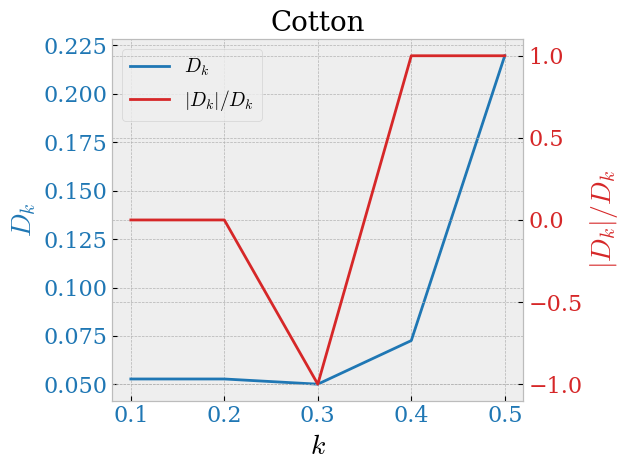

In [22]:
# Create some mock data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('$k$',size=20)
ax1.set_ylabel('$D_k$',color=color,size=20)
lns1 =ax1.plot(i,cotton_list,color=color,label='$D_k$')
ax1.tick_params(axis='y',labelcolor=color,labelsize=16)
ax1.tick_params(axis='x',labelcolor=color,labelsize=16)
ax1.set_title("Cotton",size=20)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('$|D_k|/D_k$',color=color,size=20)
lns2 =ax2.plot(i, cotton_difference,color=color,label='$|D_k|/D_k$')
ax2.tick_params(axis='y',labelcolor=color,labelsize=16)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0,prop={'size':14})

fig.tight_layout()
plt.savefig('cotton.png',dpi=330,format='png',bbox_inches='tight')
files.download('cotton.png')

In [ ]:
area = fruit_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 1205268
cropland 3319601
cropland 2510339
cropland 1801713
cropland 1234595
cropland 92321
cropland 0
cropland 0


In [ ]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 7
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

forestData = np.array(data['max'].values)
forestData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
forest_test.csv


array([0.3299796 , 0.33720568, 0.47186902, 0.6525414 , 0.6316973 ,
       0.3387018 , 0.6254419 , 0.6191597 , 0.6062391 , 0.6978651 ,
       0.54059285, 0.63272125, 0.61981356, 0.6245842 , 0.61699307,
       0.6987912 , 0.6234597 , 0.6022217 ])

In [ ]:
Data = forestData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [ ]:
image_percent = [x/sum(image) for x in image]
image_percent

[0.0,
 0.0,
 0.11858395603943668,
 0.326609035544352,
 0.246987333622135,
 0.1772670104803924,
 0.12146938208473827,
 0.009083282228945624,
 0.0,
 0.0]

In [ ]:
point_percent = [x/sum(point) for x in point]
point_percent

[0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.05555555555555555,
 0.05555555555555555,
 0.7222222222222222,
 0.0,
 0.0,
 0.0]

In [ ]:
D = 0
end = 5
new_image = image[:-4]
new_point_percent = point_percent[:-4]
for j in range(0,end):
  new_image[j] = 0
  new_image_percent = [x/sum(new_image) for x in new_image]
  D = 0
  # print(new_image_percent)
  # print(new_point_percent)
  for i in range(0,len(new_image_percent)):
    x = (abs(point_percent[i]-new_image_percent[i])-0.1)**2
    D = D+x
  print(D)

0.05205457113096666
0.05205457113096666
0.09487496293787434
0.2852315792348148
0.7495061728395062


In [11]:
forest_list = [0.05205457113096666,0.05205457113096666,0.09487496293787434,0.2852315792348148,0.7495061728395062]
forest_difference = [0]
for i in range(1,len(forest_list)):
  if forest_list[i]-forest_list[i-1] == 0:
    forest_difference.append(0)
  elif forest_list[i]-forest_list[i-1] > 0:
    forest_difference.append(1)
  else:
    forest_difference.append(-1)
i = [0.1,0.2,0.3,0.4,0.5]
forest_difference

[0, 0, 1, 1, 1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

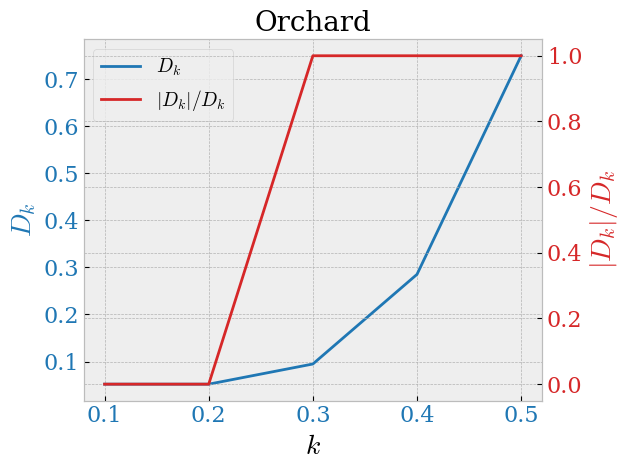

In [23]:
# Create some mock data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('$k$',size=20)
ax1.set_ylabel('$D_k$',color=color,size=20)
lns1 =ax1.plot(i,forest_list,color=color,label='$D_k$')
ax1.tick_params(axis='y',labelcolor=color,labelsize=16)
ax1.tick_params(axis='x',labelcolor=color,labelsize=16)
ax1.set_title("Orchard",size=20)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('$|D_k|/D_k$',color=color,size=20)
lns2 =ax2.plot(i, forest_difference,color=color,label='$|D_k|/D_k$')
ax2.tick_params(axis='y',labelcolor=color,labelsize=16)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0,prop={'size':14})

fig.tight_layout()
plt.savefig('Orchard.png',dpi=330,format='png',bbox_inches='tight')
files.download('Orchard.png')

In [ ]:
area = wheat_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 511444
cropland 905476
cropland 510822
cropland 97277
cropland 0
cropland 0
cropland 0
cropland 0


In [ ]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 9
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

wheatData = np.array(data['max'].values)
wheatData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
wheat_test.csv


array([0.3128173 , 0.35823327, 0.46870252, 0.49817422])

In [ ]:
Data = wheatData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [ ]:
image_percent = [x/sum(image) for x in image]
image_percent

[0.0,
 0.0,
 0.25256256854873954,
 0.44714444654593366,
 0.252255410936885,
 0.04803757396844178,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
point_percent = [x/sum(point) for x in point]
point_percent

[0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
D = 0
end = 5
new_image = image[:-4]
new_point_percent = point_percent[:-4]
for j in range(0,end):
  new_image[j] = 0
  new_image_percent = [x/sum(new_image) for x in new_image]
  D = 0
  # print(new_image_percent)
  # print(new_point_percent)
  for i in range(0,len(new_image_percent)):
    x = (abs(point_percent[i]-new_image_percent[i])-0.1)**2
    D = D+x
  print(D)

0.07002649347882511
0.07002649347882511
0.035186804124346764
0.2512111553667974
1.1600000000000001


In [13]:
wheat_list = [0.07002649347882511,0.07002649347882511,0.035186804124346764,0.2512111553667974,1.1600000000000001]
wheat_difference = [0]
for i in range(1,len(wheat_list)):
  if wheat_list[i]-wheat_list[i-1] == 0:
    wheat_difference.append(0)
  elif wheat_list[i]-wheat_list[i-1] > 0:
    wheat_difference.append(1)
  else:
    wheat_difference.append(-1)
i = [0.1,0.2,0.3,0.4,0.5]
wheat_difference

[0, 0, -1, 1, 1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

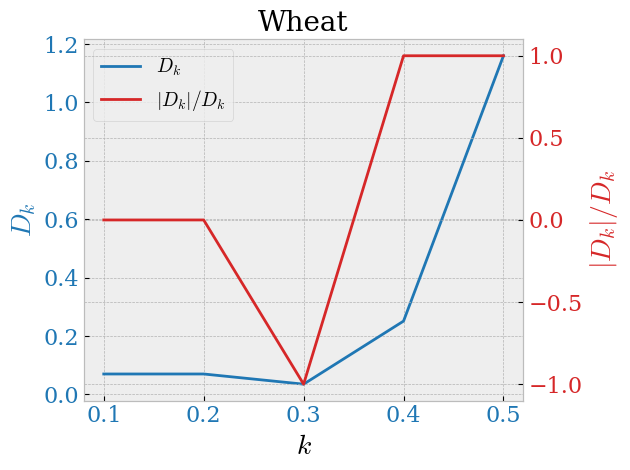

In [24]:
# Create some mock data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('$k$',size=20)
ax1.set_ylabel('$D_k$',color=color,size=20)
lns1 =ax1.plot(i,wheat_list,color=color,label='$D_k$')
ax1.tick_params(axis='y',labelcolor=color,labelsize=16)
ax1.tick_params(axis='x',labelcolor=color,labelsize=16)
ax1.set_title("Wheat",size=20)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('$|D_k|/D_k$',color=color,size=20)
lns2 =ax2.plot(i, wheat_difference,color=color,label='$|D_k|/D_k$')
ax2.tick_params(axis='y',labelcolor=color,labelsize=16)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0,prop={'size':14})

fig.tight_layout()
plt.savefig('wheat.png',dpi=330,format='png',bbox_inches='tight')
files.download('wheat.png')

In [ ]:
area = corn_wheat_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 1286876
cropland 3333178
cropland 2406587
cropland 130224
cropland 0
cropland 0
cropland 0
cropland 0


In [ ]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 8
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

corn_wheatData = np.array(data['max'].values)
corn_wheatData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
corn_wheat_test.csv


array([0.59556866, 0.3892754 , 0.43025994, 0.390699  , 0.37880507,
       0.44186887, 0.2715612 , 0.31079498, 0.38105318, 0.284923  ,
       0.627439  , 0.43228045, 0.40467545, 0.39652765, 0.38301843,
       0.41836673])

In [ ]:
Data = corn_wheatData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [ ]:
image_percent = [x/sum(image) for x in image]
image_percent

[0.0,
 0.0,
 0.17981001458040635,
 0.46573157381060004,
 0.33626273515009714,
 0.018195676458896456,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
point_percent = [x/sum(point) for x in point]
point_percent

[0.0, 0.0, 0.125, 0.4375, 0.3125, 0.0625, 0.0625, 0.0, 0.0, 0.0]

In [ ]:
D = 0
end = 5
new_image = image[:-4]
new_point_percent = point_percent[:-4]
for j in range(0,end):
  new_image[j] = 0
  new_image_percent = [x/sum(new_image) for x in new_image]
  D = 0
  # print(new_image_percent)
  # print(new_point_percent)
  for i in range(0,len(new_image_percent)):
    x = (abs(point_percent[i]-new_image_percent[i])-0.1)**2
    D = D+x
  print(D)

0.036106970707934755
0.036106970707934755
0.02511374505609646
0.4298969404209922
0.88109375


In [15]:
corn_wheat_list = [0.036106970707934755,0.036106970707934755,0.02511374505609646,0.4298969404209922,0.88109375]
corn_wheat_difference = [0]
for i in range(1,len(corn_wheat_list)):
  if corn_wheat_list[i]-corn_wheat_list[i-1] == 0:
    corn_wheat_difference.append(0)
  elif corn_wheat_list[i]-corn_wheat_list[i-1] > 0:
    corn_wheat_difference.append(1)
  else:
    corn_wheat_difference.append(-1)
i = [0.1,0.2,0.3,0.4,0.5]
corn_wheat_difference

[0, 0, -1, 1, 1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

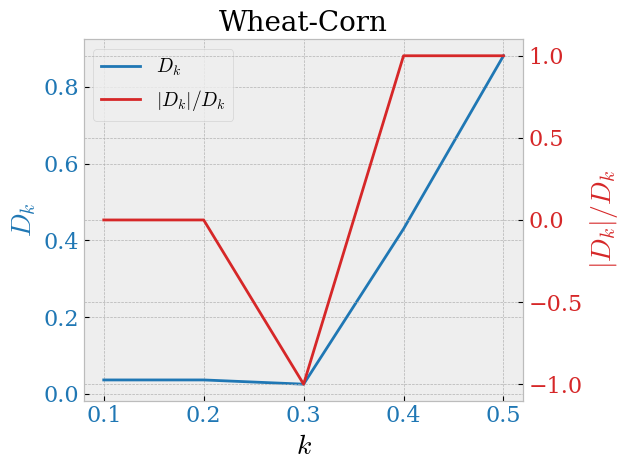

In [25]:
# Create some mock data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('$k$',size=20)
ax1.set_ylabel('$D_k$',color=color,size=20)
lns1 =ax1.plot(i,corn_wheat_list,color=color,label='$D_k$')
ax1.tick_params(axis='y',labelcolor=color,labelsize=16)
ax1.tick_params(axis='x',labelcolor=color,labelsize=16)
ax1.set_title("Wheat-Corn",size=20)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('$|D_k|/D_k$',color=color,size=20)
lns2 =ax2.plot(i, corn_wheat_difference,color=color,label='$|D_k|/D_k$')
ax2.tick_params(axis='y',labelcolor=color,labelsize=16)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0,prop={'size':14})

fig.tight_layout()
plt.savefig('corn_wheat.png',dpi=330,format='png',bbox_inches='tight')
files.download('corn_wheat.png')